## Regresión con Máquinas de Soporte Vectorial (SVR)

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
x_normal = X
y_normal = y


In [7]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y.reshape(-1,1))

In [8]:
from sklearn.svm import SVR

In [9]:
regression = SVR(kernel = "rbf")
regression.fit(X, y)

c:\Python311\Lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

##### Transformar el valor a predecir

In [10]:
y_pred = regression.predict(sc_X.transform(np.array([[1]])))

##### Transformación inversa para obtener el valor real

In [11]:
y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(np.array([[1]]))).reshape(-1,1))

##### Visualización de los resultados del SVR

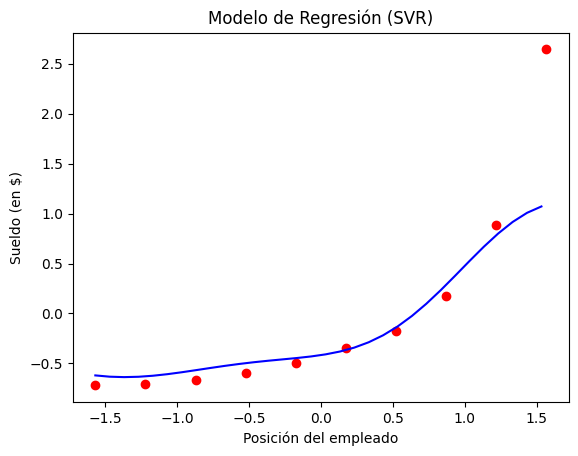

In [12]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape(len(X_grid), 1)

Y_pred = regression.predict(X_grid)

plt.scatter(X, y, color = "red")
plt.plot(X_grid, Y_pred, color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()

##### Re-escalamiento

In [13]:
X_inv = sc_X.inverse_transform(X_grid)
Y_pred = sc_y.inverse_transform(regression.predict(sc_X.transform(X_inv)).reshape(-1,1))

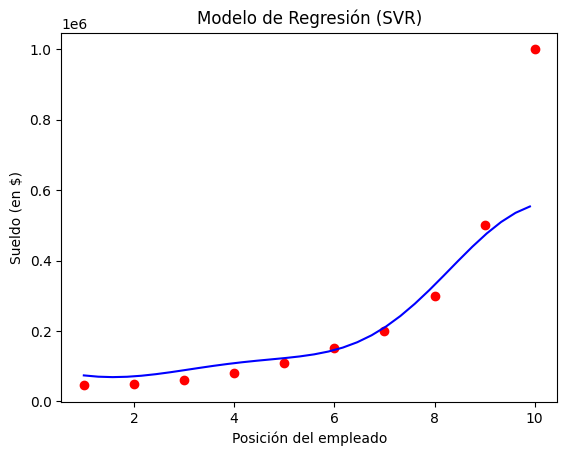

In [14]:
plt.scatter(x_normal, y_normal, color = "red")
plt.plot(X_inv, Y_pred, color = "blue")
plt.title("Modelo de Regresión (SVR)")
plt.xlabel("Posición del empleado")
plt.ylabel("Sueldo (en $)")
plt.show()